# Gaussian distribution in one dimension

The following will demonstrate integration of a differential equation for a probability distribution.  The distribution obeys the following differential equation,

\begin{equation}
\partial_t\rho = -\partial_a(v^a \rho),
\end{equation}

where $v^a$ is the velocity of probability flow.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField, Gaussian1D
import etraj.etraj as et

In [11]:
# we can use numpy to generate a sample with mean = 0 and sigma = 1
N = 100
x = np.random.uniform(-np.pi,np.pi,N)

# and then create the unstructured grid
g = UGrid(x)

In [12]:
# setting mu = 0, sigma = 1,
mu = 0
sigma = 1
# the field values are
p = np.cos(x)
#p = (1/np.sqrt(2*np.pi*sigma))*np.exp(-(.5/sigma**2)*(x - mu)**2)

In [13]:
# finally we have for the field,
G = Gaussian1D(g,mu,sigma)
G.set_field(p)
G.get_approximator().set_k(6)
#G.get_approximator().set_n(3)

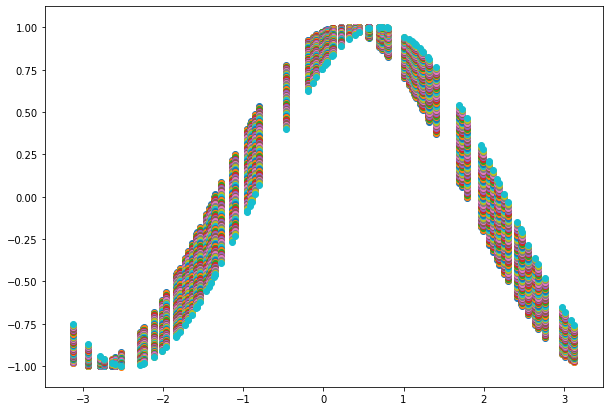

In [15]:
# first import the integrator
from etraj.etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
for i in range(50):
    G.get_integrator().scalar_RK4_step(g,G,0.01)
    axs.scatter(x,G.get_field())

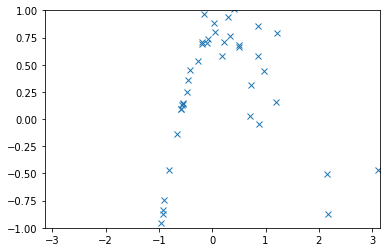

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
line, = ax.plot([], [], linestyle="",marker='x')


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-1, 1)
    return line,



# animation function. This is called sequentially
def animate(i):
    G.get_integrator().scalar_RK4_step(g,G,0.01)
    y = G.get_field()
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

HTML(anim.to_html5_video())
# # Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
# anim.save('gauss.mp4', writer=writer)
# plt.show